**TIM 7**

---

1. Ilma Khoiruzzidan (18523245)
2. Muhd Humam Rhamadhani (18523264)
3. M Aulia Rahman (18523301)

---

**REKOMENDASI GAMBAR TEMPAT WISATA MENGGUNAKAN CNN DENGAN ARSITEKTUR VGG16**

# **Importing Drive**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pwd

'/content'

In [3]:
!cd /content/drive

# **Mengunggah Dataset**


In [4]:
!unzip drive/Shareddrives/Deep\ Learning/Dataset.zip

Archive:  drive/Shareddrives/Deep Learning/Dataset.zip
  inflating: Dataset/Danau (1).jpg   
  inflating: Dataset/Danau (10).jpg  
  inflating: Dataset/Danau (100).jpg  
  inflating: Dataset/Danau (101).jpg  
  inflating: Dataset/Danau (11).jpg  
  inflating: Dataset/Danau (12).jpg  
  inflating: Dataset/Danau (13).jpg  
  inflating: Dataset/Danau (14).jpg  
  inflating: Dataset/Danau (15).jpg  
  inflating: Dataset/Danau (16).jpg  
  inflating: Dataset/Danau (17).jpg  
  inflating: Dataset/Danau (18).jpg  
  inflating: Dataset/Danau (19).jpg  
  inflating: Dataset/Danau (2).jpeg  
  inflating: Dataset/Danau (20).jpg  
  inflating: Dataset/Danau (21).jpg  
  inflating: Dataset/Danau (22).jpg  
  inflating: Dataset/Danau (23).jpg  
  inflating: Dataset/Danau (24).jpg  
  inflating: Dataset/Danau (25).jpg  
  inflating: Dataset/Danau (26).jpg  
  inflating: Dataset/Danau (27).jpg  
  inflating: Dataset/Danau (28).jpg  
  inflating: Dataset/Danau (29).jpg  
  inflating: Dataset/Danau (3).

In [5]:
import os
import pickle
from glob import glob

# import basic numerical libraries
import numpy as np
import pandas as pd

# import keras libraries for image recognition
from keras.applications import vgg16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image as kimage
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import cv2
from IPython.display import Image
import re

# **Membuat *Dataframe* untuk dataset** 


In [6]:
image_df = pd.DataFrame()
image_df['Dataset'] = glob('Dataset/*')
image_df.head()
image_df.shape

(421, 1)

# ***Training* model dari dataset-nya**
## Disini kami menggunakan arsitektur **VGG16** 


In [7]:
# Training model
model = vgg16.VGG16(include_top=False, weights='imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [8]:
# Membuat dictionary dari dataset untuk memberikan pengenalan nantinya pada gambar sebagai rekomendasi
def get_embeddings(model,image):
   # VGG hanya bisa menginput gambar dengan ukuran 224x224
    img = kimage.load_img(image, target_size=(224, 224))   
    img = preprocess_input(np.expand_dims(kimage.img_to_array(img), axis=0))  
    id = re.findall(r'\d+', image)
    id = int(id[0])
    return model.predict(img).ravel()

# ***Trimming* bentuk gambar dari dataset**

In [9]:
trim_image_df = image_df.head(400)

In [10]:
trim_image_df['embeddings'] = trim_image_df.apply(lambda x: get_embeddings(model,x.Dataset),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
trim_image_df.head()

,Dataset,embeddings
0,Dataset/Danau (61).jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Dataset/mall (8).jpeg,"[0.0, 0.0, 0.0, 0.0, 2.3281724, 0.0, 0.0, 0.0,..."
2,Dataset/Danau (74).jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Dataset/Pantai (24).jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Dataset/Pantai (75).jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [13]:
df_embs = trim_image_df['embeddings'].apply(pd.Series)
df_embs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,25048,25049,25050,25051,25052,25053,25054,25055,25056,25057,25058,25059,25060,25061,25062,25063,25064,25065,25066,25067,25068,25069,25070,25071,25072,25073,25074,25075,25076,25077,25078,25079,25080,25081,25082,25083,25084,25085,25086,25087
0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,69.689766,0.0,0.0,0.0,0.0,0.0,8.402843,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.142273,0.0,0.000000,2.996161,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,3.096855,0.0,0.000000,0.0,0.0,0.0,0.000000,60.602947,39.420158,0.0,0.000000,0.0,6.441053,0.000000
1,0.0,0.000000,0.0,0.000000,2.328172,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.016589,0.0,0.0,0.0,0.0,0.0,11.518003,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.467263,0.0,0.000000,0.000000,0.000000,0.00000,54.811943,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,11.499872,33.231579,0.360373,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,38.086624,0.000000
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,32.038879,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,1.177361,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.416861,0.0,0.0,0.0,0.000000,0.000000,17.475544,0.0,0.000000,0.0,0.000000,0.000000
3,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,3.168021,0.0,0.0,0.0,0.0,0.0,0.000000,22.808582,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,4.213865,0.0,0.0,0.0,0.0,0.000000,0.000000,21.264400,0.000000,0.0,0.0,0.0,0.000000,0.0,4.622768,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
4,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,19.010677,0.0,0.0,0.0,0.0,0.0,0.000000,8.599673,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,54.944229,0.000000,0.000000,0.00000,0.000000,9.817357,0.0,0.000000,0.0,0.0,0.0,0.0,13.008296,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,33.324795,0.000000,0.0,15.716478,0.0,24.160772,19.659012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,75.956581,0.0,3.266369,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.015759,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,19.999592,14.89888,0.000000,0.000000,0.0,7.742927,0.0,0.0,0.0,0.0,0.000000,34.148766,0.000000,20.271389,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,76.402924,0.0,62.389320,0.000000
396,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,17.023495,0.0,0.0,0.0,0.0,0.0,6.415779,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.736495,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000

# **Rekomendasi gambar dari dataset sesuai kelas**

In [14]:
from sklearn.metrics.pairwise import pairwise_distances

# Menghitung jarak matrik untuk ukuran gambar
cosine_sim = 1-pairwise_distances(df_embs, metric='cosine')
cosine_sim[:4, :4]

array([[1.        , 0.07321471, 0.08990085, 0.10519361],
       [0.07321471, 1.        , 0.09760189, 0.03958803],
       [0.08990085, 0.09760189, 0.99999946, 0.09679002],
       [0.10519361, 0.03958803, 0.09679002, 1.        ]], dtype=float32)

In [15]:
indices = pd.Series(range(len(trim_image_df)), index=trim_image_df.index)

# Fungsi untuk mendapatkan rekomendasi gambar sesuai tempat wisatanya
def get_recommender(idx, df, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim

In [16]:
# Merekomendasikan gambar ke 20 sebagai bentuk modelnya
get_recommender(20, trim_image_df, top_n = 5)

(Int64Index([241, 65, 320, 111, 219], dtype='int64'),
 [0.91853166, 0.9135845, 0.6824116, 0.6628692, 0.62400466])

In [17]:
# Import dependensi untuk plotting
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import cv2
from IPython.display import Image

In [18]:
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):


    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() 
    
def img_path(img):
    return img

def load_image(img, resized_fac = 0.1):
    img     = cv2.imread(img_path(img))
    w, h, _ = img.shape
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized

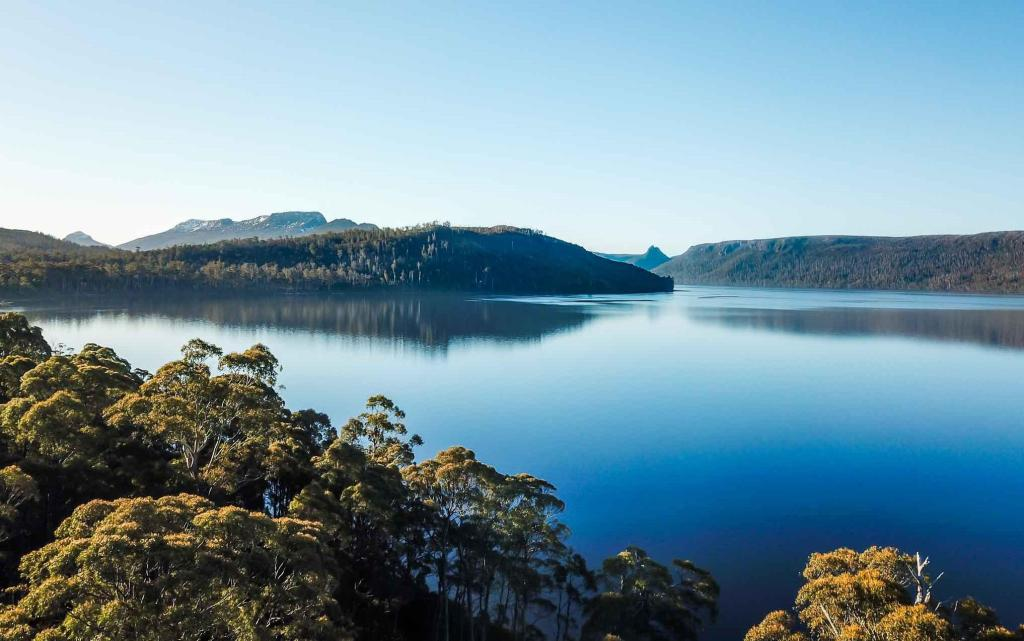


Rekomendasi lainnya :   



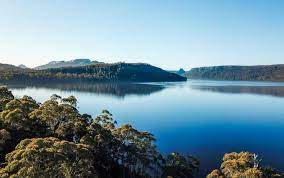

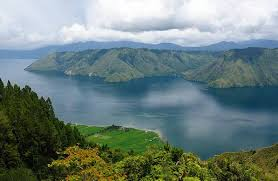

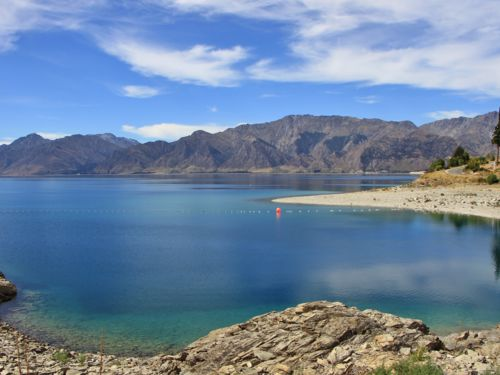

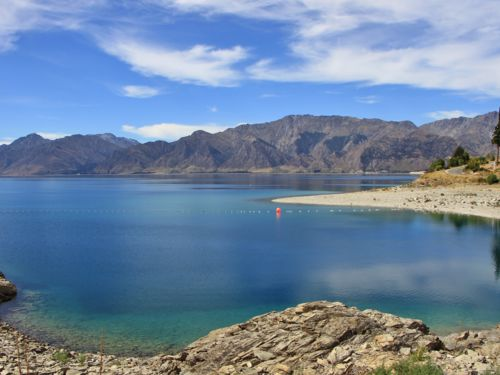

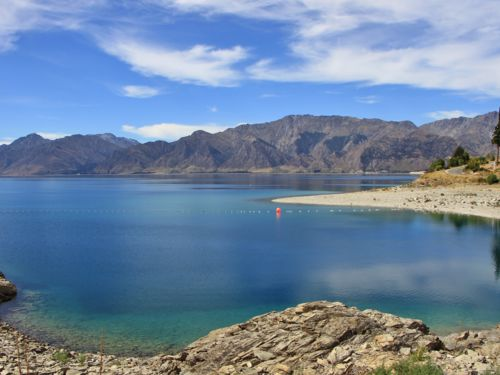

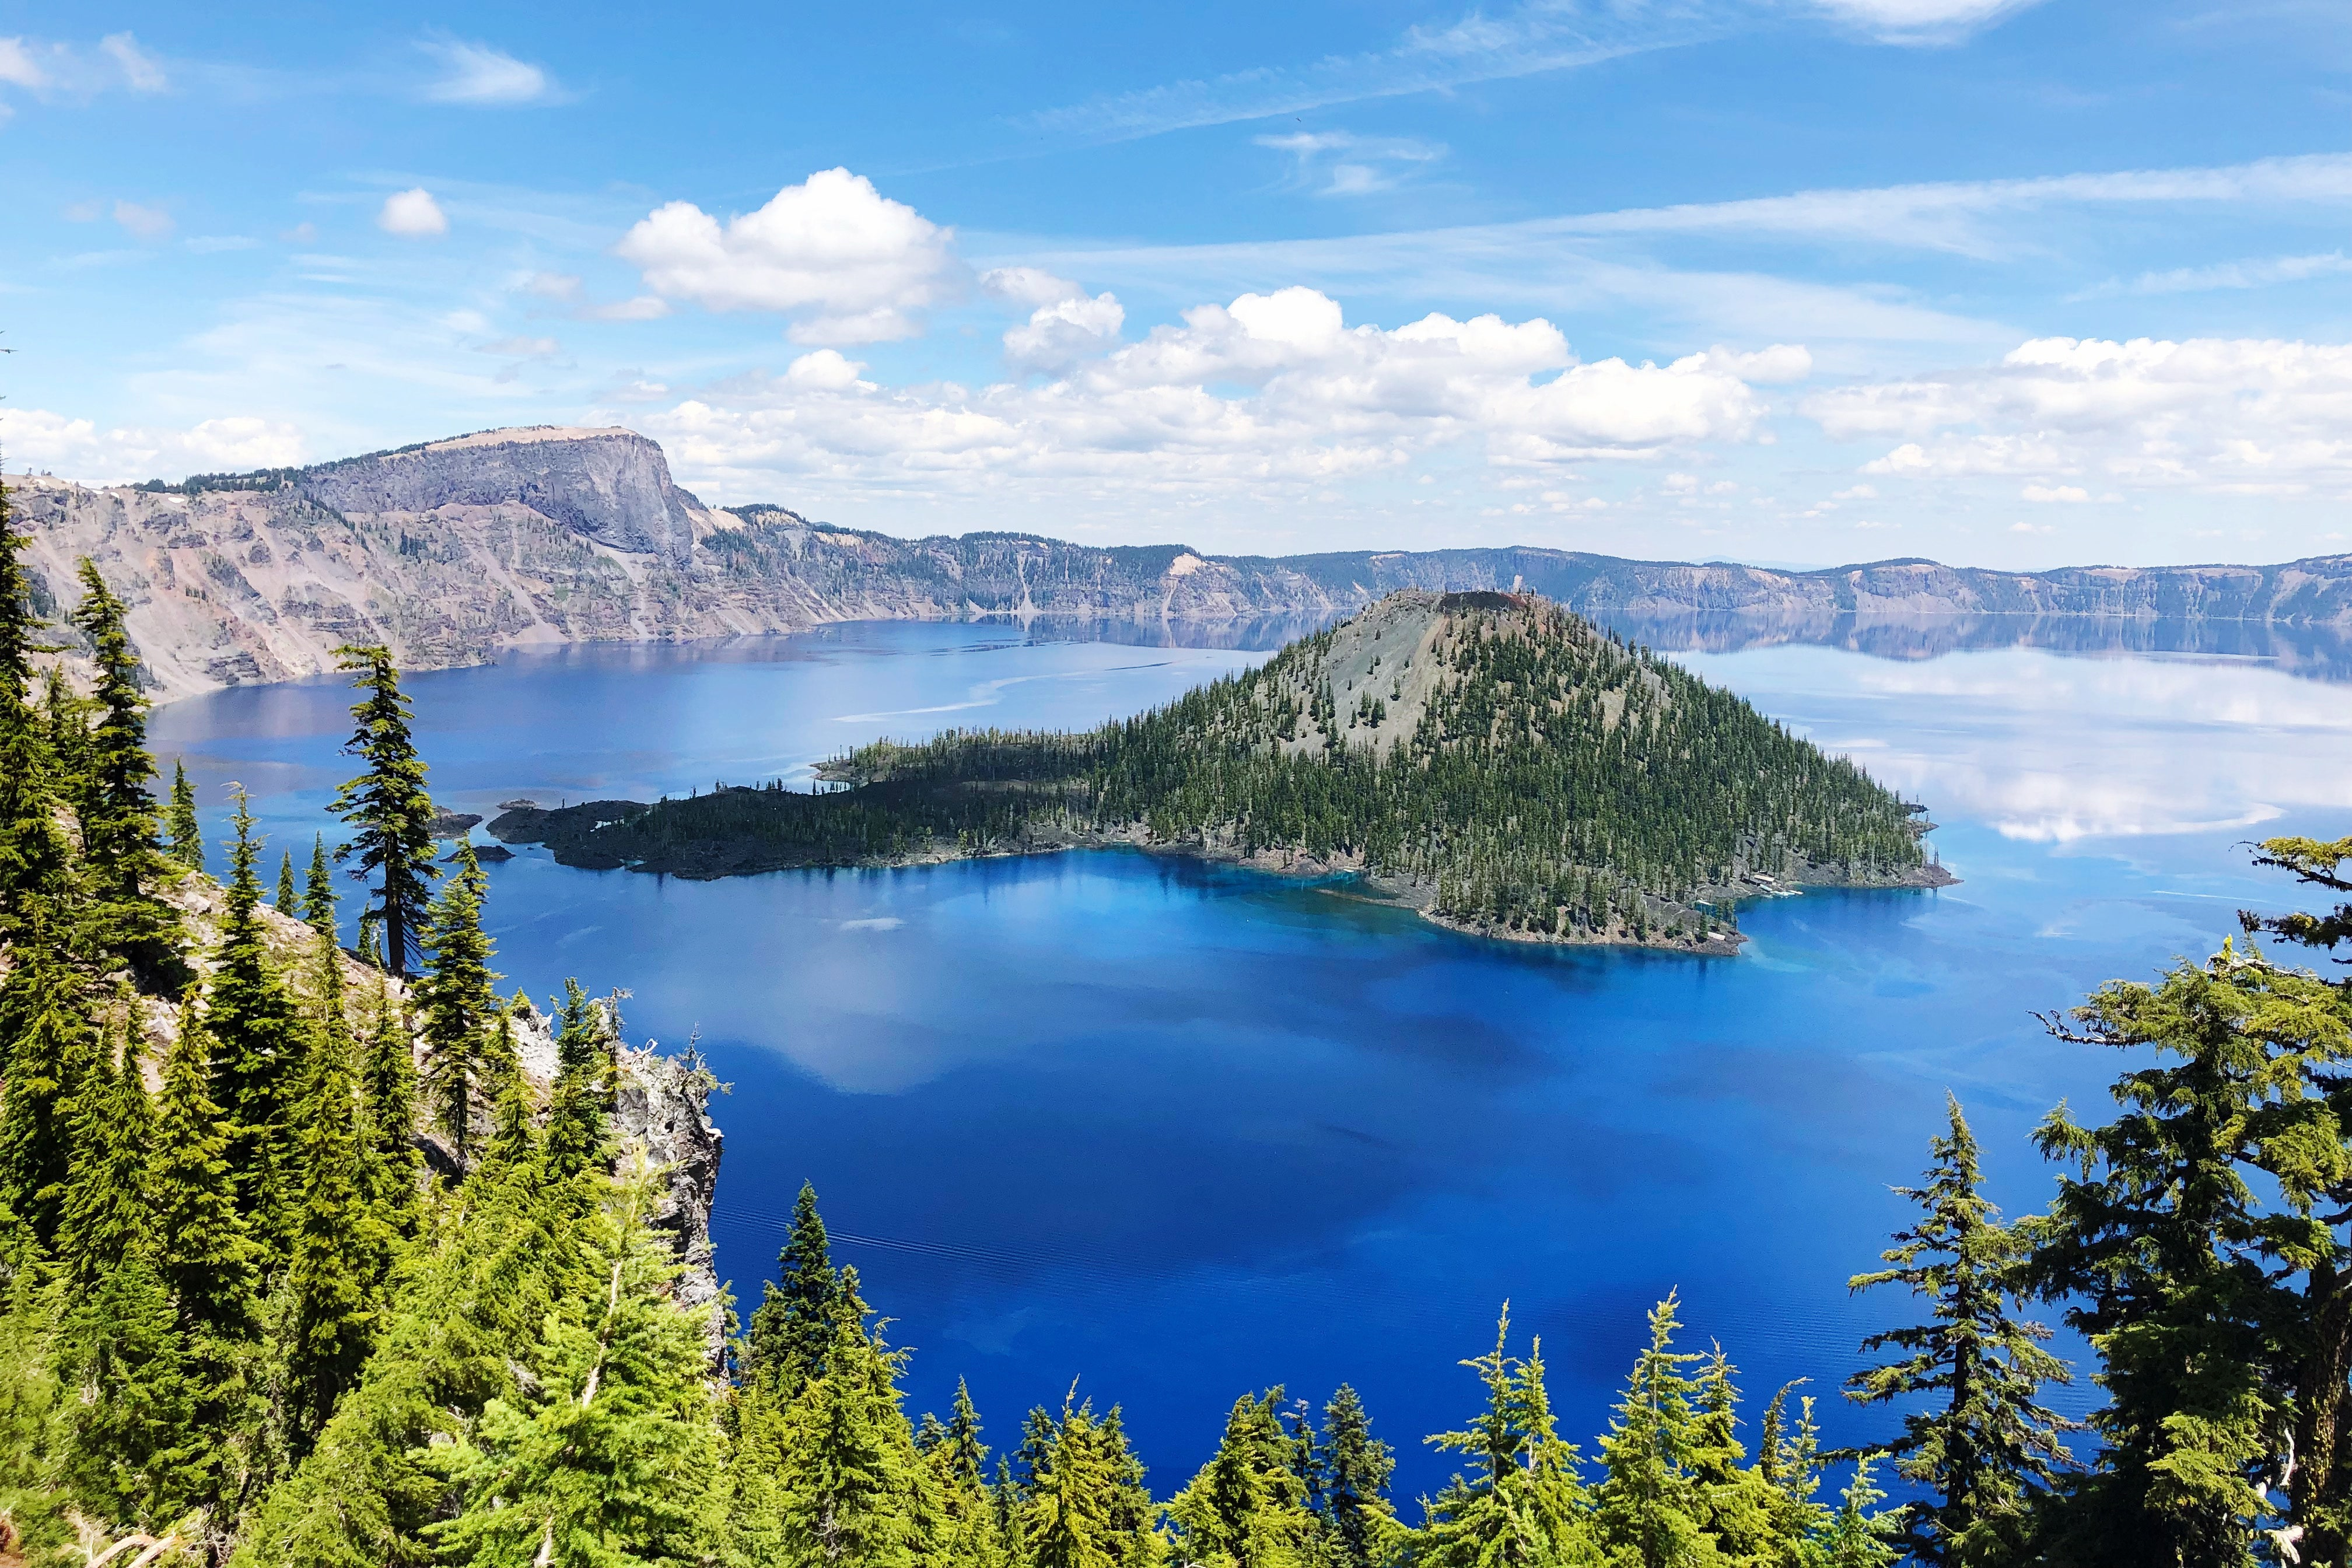

In [19]:
# Meng-input gambar yang ingin direkomendasikan
idx_ref = 381

# Rekomendasi gambar ke dataset
idx_rec, idx_sim = get_recommender(idx_ref, image_df, top_n = 6)

# Plotting
display(Image(image_df.iloc[idx_ref].Dataset))

# Mengenerasikan dictionary dari dataset (judul, gambar)
figures = [row for row in image_df.loc[idx_rec].Dataset]
# Plot gambar dengan 2 baris dan 3 kolom
print("\nRekomendasi lainnya :   \n")
for i in figures:
  display(Image(i))